In [289]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [261]:
data = pd.read_excel("./DOIvDOIMDL.xlsx")

In [262]:
data.tail()

,ROIs,regionLabels,structureOrder,atlas_info,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,p-value,q-value
874,poc,174,113000,13,0,0,0,0,0,0,0,0,0,0,1.000000,1.0
875,php,182,113700,13,1,0,0,1,0,0,0,0,0,0,0.998581,1.0
876,phpl,770,113900,5,0,0,0,0,0,0,0,0,0,0,1.000000,1.0
877,grv,1024,117000,2,0,0,0,0,0,0,0,0,0,0,1.000000,1.0
878,IPF,624,119100,2,0,0,0,0,0,0,0,0,0,0,1.000000,1.0


In [263]:
df = data.melt(value_name = "cell_count", var_name = "animal_id", value_vars = ["A1", "A2", "A3", "A4", "A5", "B1", "B2", "B3", "B4", "B5"], id_vars = ["ROIs", "p-value"] )

In [267]:
df.tail()

,ROIs,p-value,animal_id,cell_count,Condition
8785,poc,1.000000,B5,0,MDLDOI
8786,php,0.998581,B5,0,MDLDOI
8787,phpl,1.000000,B5,0,MDLDOI
8788,grv,1.000000,B5,0,MDLDOI
8789,IPF,1.000000,B5,0,MDLDOI


In [268]:
df["Condition"].replace(to_replace = "A1", regex = True,  value = "DOI", inplace = True )
df["Condition"].replace(to_replace = "A2", regex = True,  value = "DOI", inplace = True )
df["Condition"].replace(to_replace = "A3", regex = True,  value = "DOI", inplace = True )
df["Condition"].replace(to_replace = "A4", regex = True,  value = "DOI", inplace = True )
df["Condition"].replace(to_replace = "A5", regex = True,  value = "DOI", inplace = True )

df["Condition"].replace(to_replace = "B1", regex = True,  value = "MDLDOI", inplace = True )
df["Condition"].replace(to_replace = "B2", regex = True,  value = "MDLDOI", inplace = True )
df["Condition"].replace(to_replace = "B3", regex = True,  value = "MDLDOI", inplace = True )
df["Condition"].replace(to_replace = "B4", regex = True,  value = "MDLDOI", inplace = True )
df["Condition"].replace(to_replace = "B5", regex = True,  value = "MDLDOI", inplace = True )

In [431]:
df["mean_count"] = df.groupby(["ROIs"])["cell_count"].transform(np.mean)
df["std_count"] = df.groupby(["ROIs"])["cell_count"].transform(np.max)

In [442]:
df["norm_count"] = (df["cell_count"] - df["mean_count"])/df["mean_count"]

In [443]:
import allensdk
from allensdk.api.queries.ontologies_api import OntologiesApi

In [444]:
oapi = OntologiesApi()
structure_graph = oapi.get_structures_with_sets([1])  # 1 is the id of the adult mouse structure graph
from allensdk.core.structure_tree import StructureTree

# This removes some unused fields returned by the query
structure_graph = StructureTree.clean_structures(structure_graph)  

tree = StructureTree(structure_graph)

In [445]:
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache

# The manifest file is a simple JSON file that keeps track of all of
# the data that has already been downloaded onto the hard drives.
# If you supply a relative path, it is assumed to be relative to your
# current working directory.
mcc = MouseConnectivityCache(manifest_file='connectivity/mouse_connectivity_manifest.json')


In [446]:
from allensdk.api.queries.ontologies_api import OntologiesApi

oapi = OntologiesApi()

# get the ids of all the structure sets in the tree
structure_set_ids = structure_tree.get_structure_sets()

# query the API for information on those structure sets
allen_stuff = pd.DataFrame(oapi.get_structure_sets(structure_set_ids))

In [447]:
allen_stuff

,description,id,name
0,List of structures in Isocortex layer 5,667481446,Isocortex layer 5
1,List of structures in Isocortex layer 6b,667481450,Isocortex layer 6b
2,Summary structures of the cerebellum,688152368,Cerebellum
3,List of structures for ABA Differential Search,12,ABA - Differential Search
4,List of valid structures for projection target...,184527634,Mouse Connectivity - Target Search
5,Structures whose surfaces are represented by a...,691663206,Mouse Brain - Has Surface Mesh
6,Summary structures of the midbrain,688152365,Midbrain
7,Summary structures of the medulla,688152367,Medulla
8,Summary structures of the striatum,688152361,Striatum
9,Structures representing subdivisions of the mo...,687527945,Mouse Connectivity - Summary


In [448]:
target_groups = ['Cerebellum', 'Pallidum', 'Striatum', 'Olfactory Areas', 
                 'Hippocampal Formation', 'Hypothalamus', 'IsoCortex', 
                 'Cortical Subplate', "Thalamus", "Pons", "Midbrain"]

ids = [688152368, 688152362, 688152361, 688152358, 
       688152359, 688152364, 688152357, 688152360,
       688152363, 688152366, 688152365]

df["acronym"] = df["ROIs"]
merged_dfs = []

for i in range(len(target_groups)):
    summary_structures = structure_tree.get_structures_by_set_id([ids[i]])
    sum_structs = pd.DataFrame(summary_structures)["acronym"]

    data = df[df.ROIs.isin(sum_structs)].merge(pd.DataFrame(summary_structures), on = "acronym")
    data['region'] = [target_groups[i]]*len(data)
    merged_dfs.append(data)

In [522]:
    summary_structures = structure_tree.get_structures_by_set_id([688152361])
    sum_structs = pd.DataFrame(summary_structures)["name"]

In [523]:
sum_structs

0                                          Caudoputamen
1                                     Nucleus accumbens
2                                    Fundus of striatum
3                                    Olfactory tubercle
4     Lateral septal nucleus, caudal (caudodorsal) part
5     Lateral septal nucleus, rostral (rostroventral...
6                  Lateral septal nucleus, ventral part
7                                 Septofimbrial nucleus
8                              Septohippocampal nucleus
9                               Anterior amygdalar area
10         Bed nucleus of the accessory olfactory tract
11                            Central amygdalar nucleus
12                       Intercalated amygdalar nucleus
13                             Medial amygdalar nucleus
Name: name, dtype: object

In [515]:
merged_df[merged_df["p-value"] < 0.1].groupby(["region"]).apply(lambda x: str(x["region"])).reset_index().sort_values("region")

,region,0
0,Cerebellum,20 Cerebellum\n21 Cerebellum\n22 C...
1,Cortical Subplate,0 Cortical Subplate\n1 Cortical Subpla...
2,Hippocampal Formation,60 Hippocampal Formation\n61 Hippocampal...
3,Hypothalamus,70 Hypothalamus\n71 Hypothalamus\n72 ...
4,IsoCortex,10 IsoCortex\n11 IsoCortex\n12 Iso...
5,Midbrain,0 Midbrain\n1 Midbrain\n2 Midbr...
6,Olfactory Areas,0 Olfactory Areas\n1 Olfactory Areas\n...
7,Pallidum,10 Pallidum\n11 Pallidum\n12 Pallidum...
8,Pons,50 Pons\n51 Pons\n52 Pons\n53 ...
9,Striatum,10 Striatum\n11 Striatum\n12 Stria...


C:\Users\Amy\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


<Figure size 3600x3600 with 0 Axes>

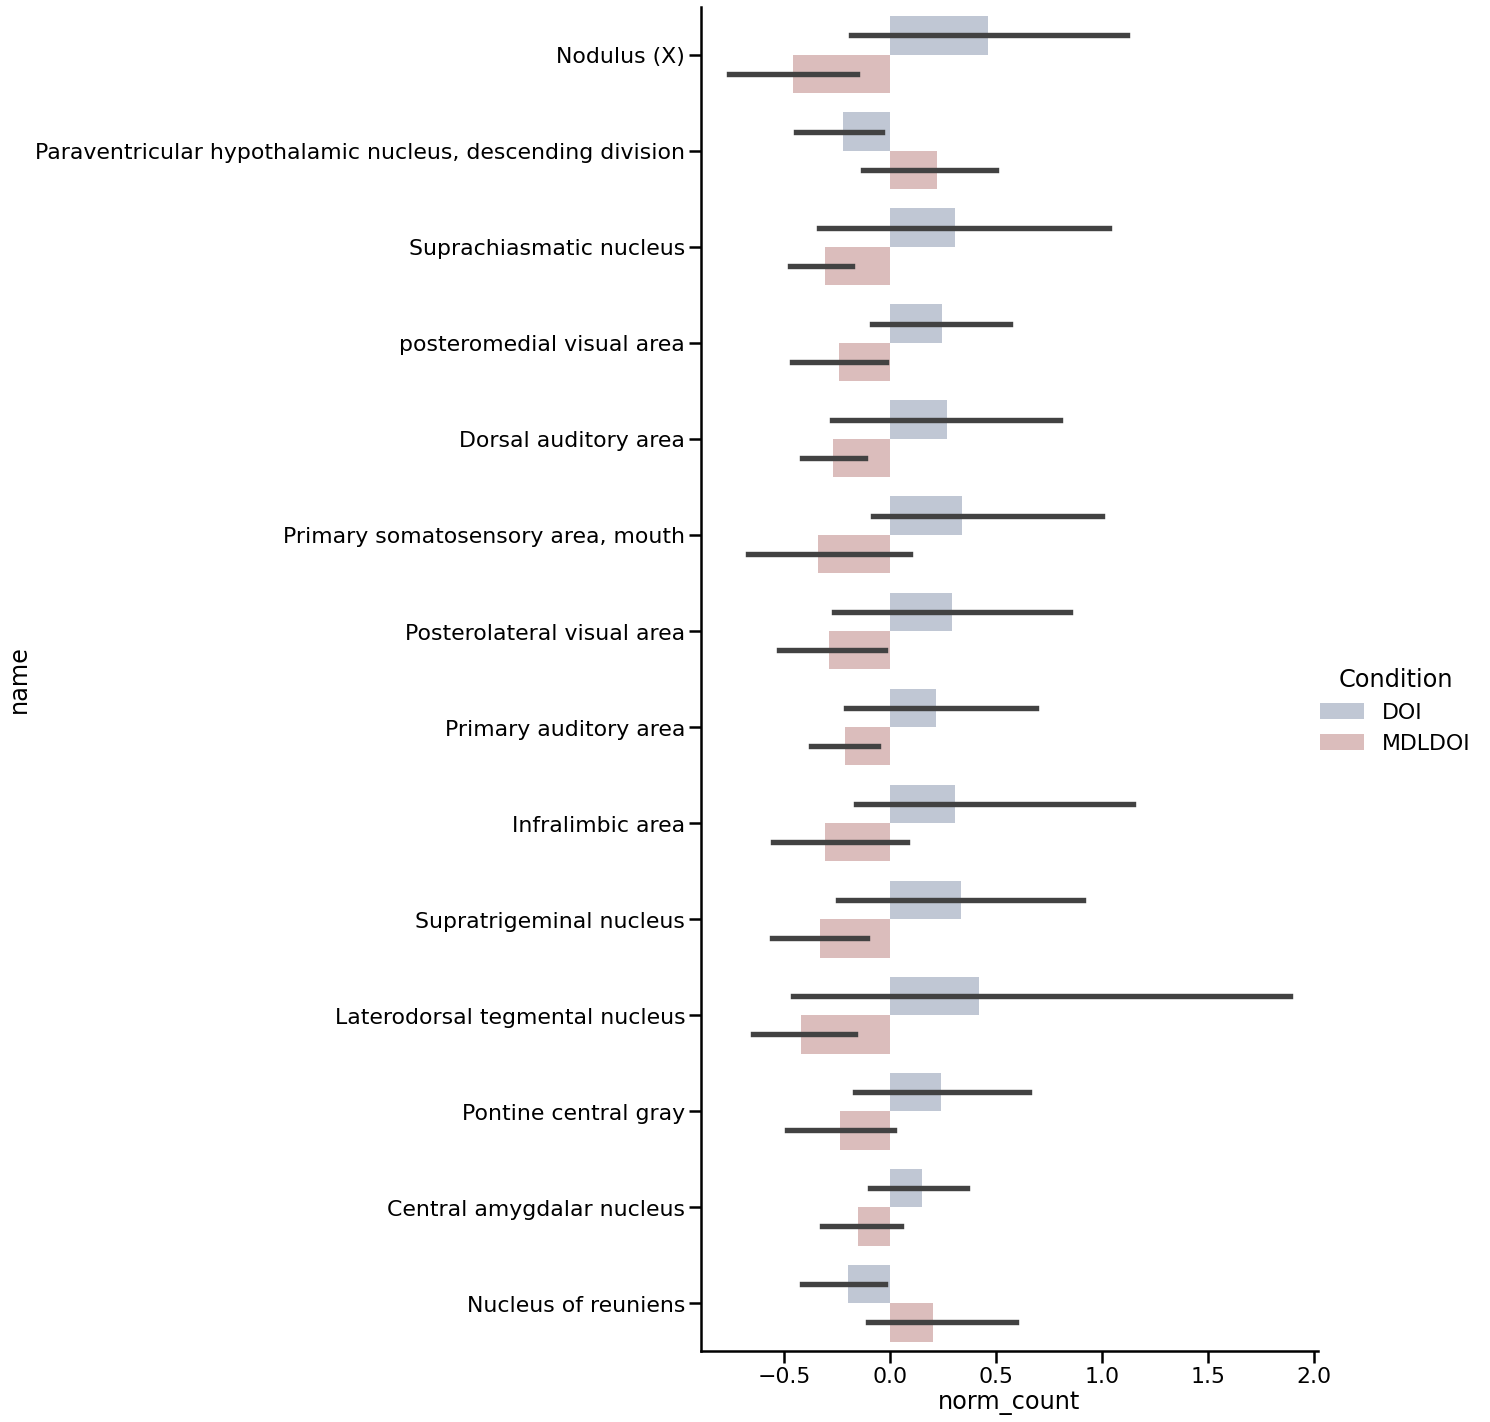

In [547]:
##### import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("poster")
plt.figure(figsize = [50, 50])


#[data["p-value"] < 0.05]

sns.catplot(x = "norm_count", y = "name", hue = "Condition", orient = "h", palette = "vlag",
            data = merged_df[(merged_df['p-value'] < 0.05) & (merged_df['p-value'] >= 0.01)].sort_values(["region", "p-value"]), 
            kind = "bar", aspect = .5, height = 20)

plt.savefig("bar_sig_regions.pdf", dpi = 300)

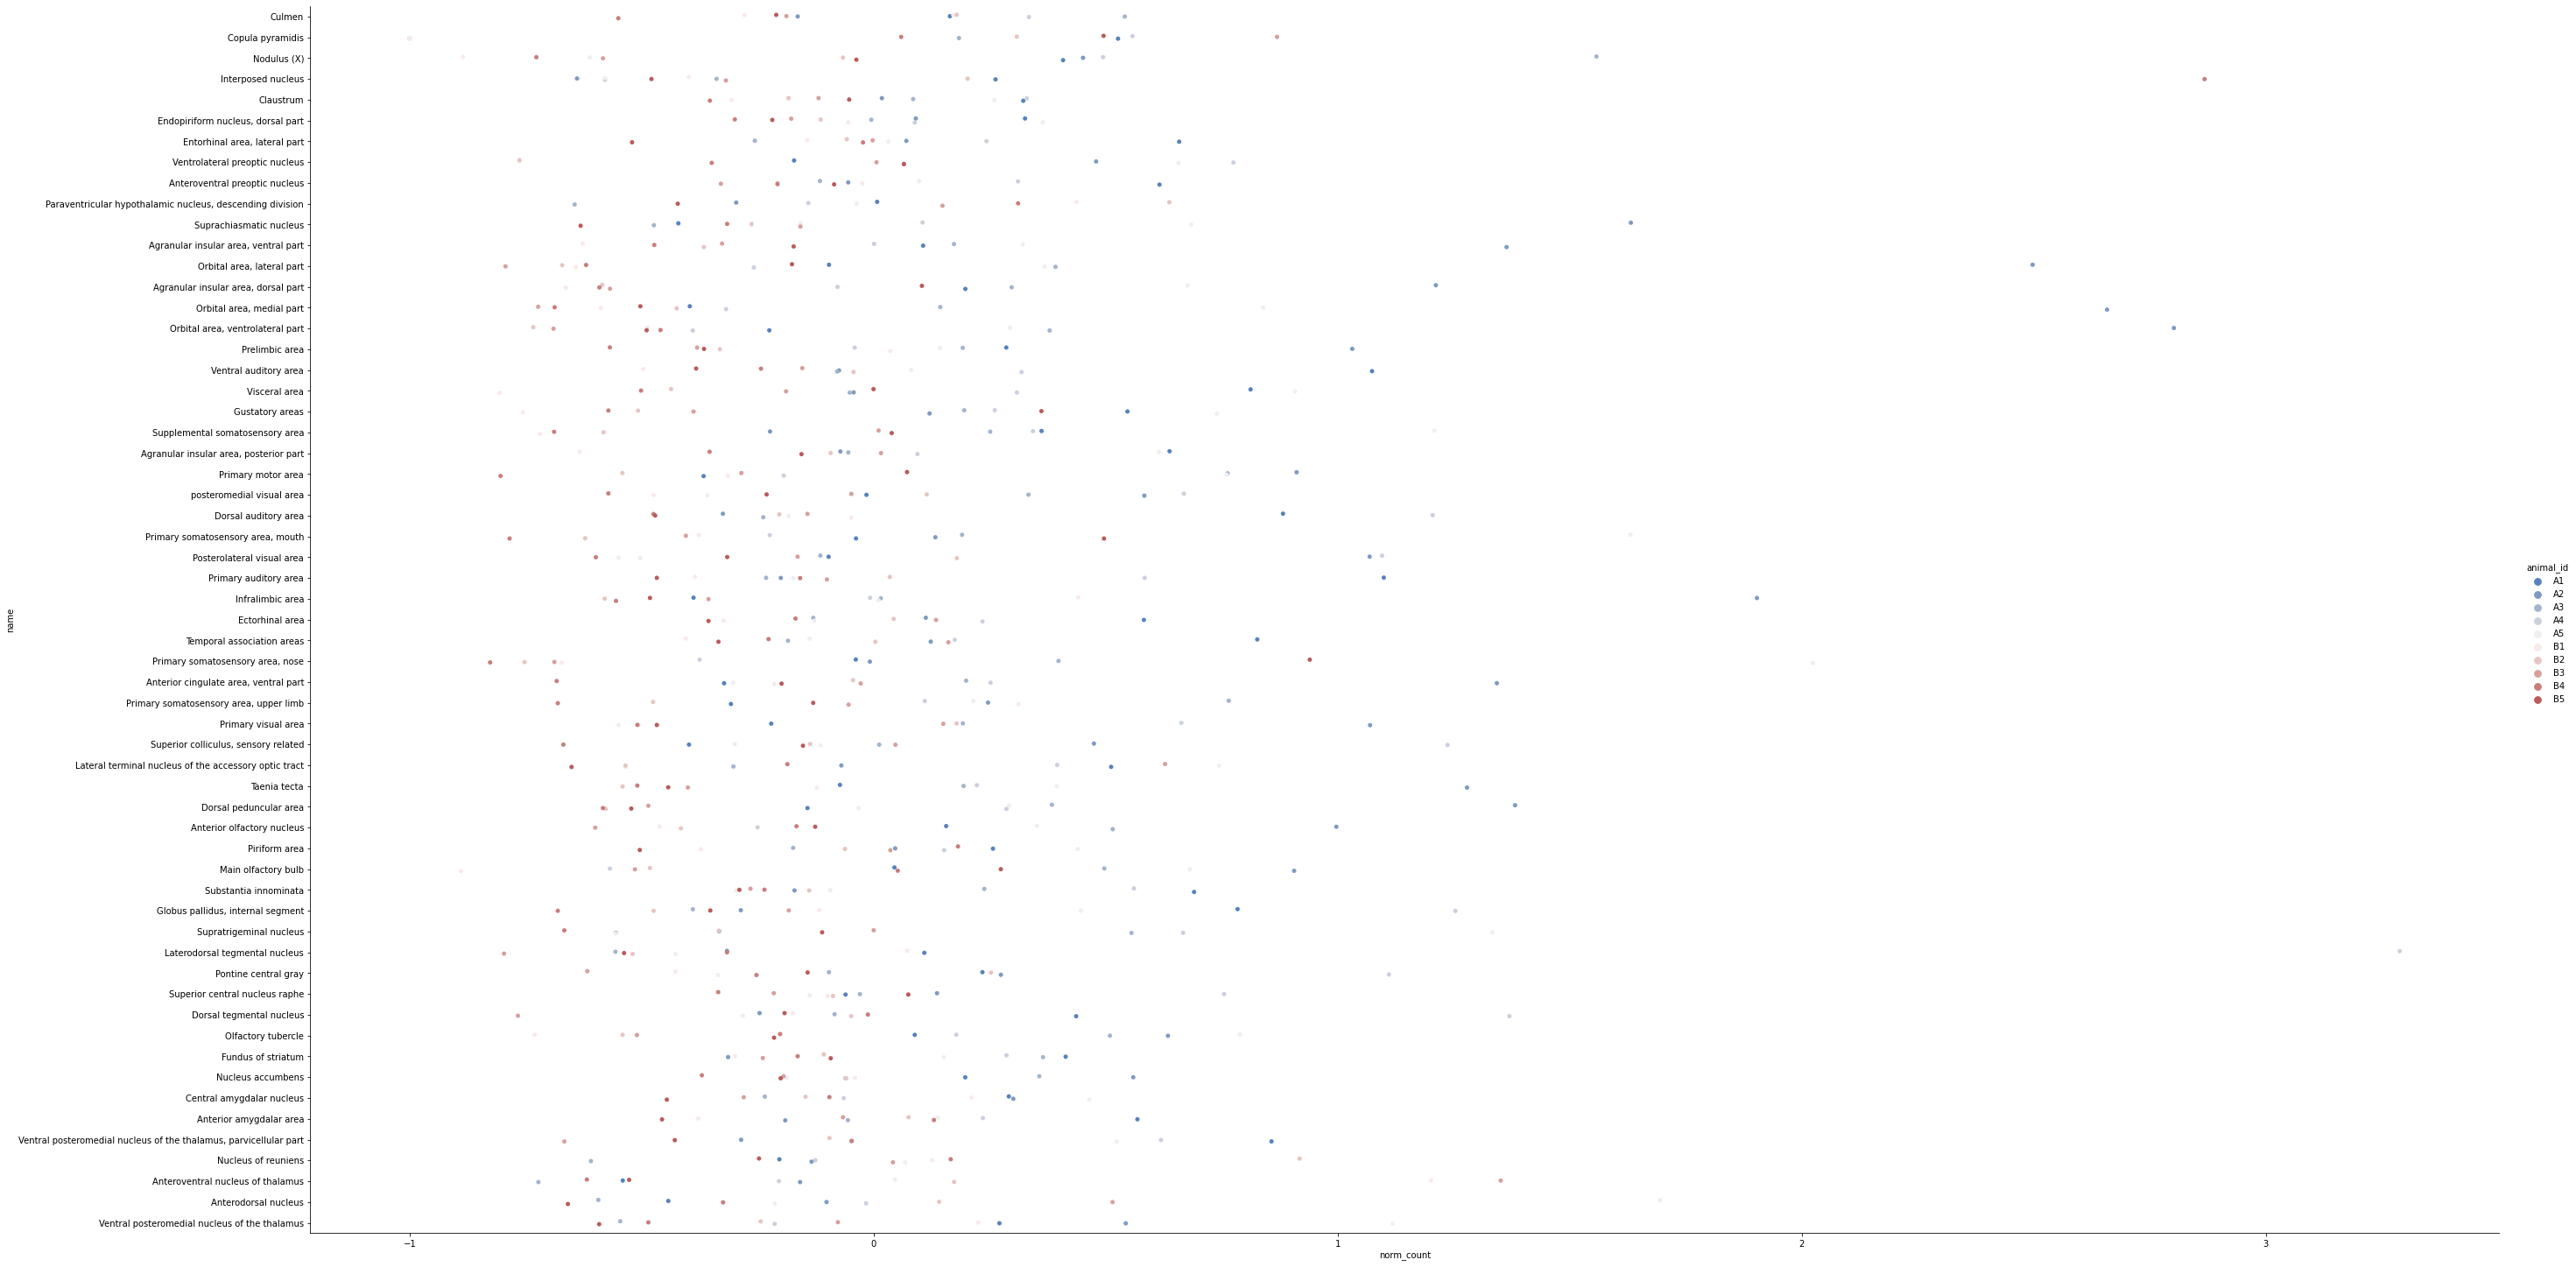

In [475]:
sns.catplot(x = "norm_count", y = "name", hue = "animal_id", orient = "h", palette = "vlag", 
            data = merged_df[merged_df["p-value"] < 0.1].sort_values(["region", "p-value"]), 
            kind = "strip", aspect = 2, height = 20)

plt.savefig("by_mouse_sig_regions.pdf", dpi = 300)

In [381]:
df["acronym"] = df["ROIs"]
data = df[df.ROIs.isin(sum_structs)].merge(pd.DataFrame(summary_structures), on = "acronym")

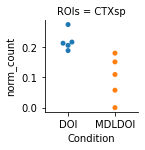

In [256]:
sns.catplot(data = df[(df["p-value"] < 0.05) & df.ROIs.isin(sum_structs)].sort_values("p-value"), x = "Condition", y = "norm_count", 
            col = 'ROIs', col_wrap = 10, kind = "swarm", height = 2, aspect = .75)